# Load Data

In [ ]:
# Loading necessary libraries
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Data Sources
ox = pd.read_csv('drive/My Drive/OxCGRT_nat_latest.csv') # (Oxford COVID-19 Government Response Tracker)
world_data_raw = pd.read_csv('drive/My Drive/World_Data.csv')

In [ ]:
ox.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202819 entries, 0 to 202818
Data columns (total 61 columns):
 #   Column                                                                           Non-Null Count   Dtype  
---  ------                                                                           --------------   -----  
 0   CountryName                                                                      202819 non-null  object 
 1   CountryCode                                                                      202819 non-null  object 
 2   RegionName                                                                       0 non-null       float64
 3   RegionCode                                                                       0 non-null       float64
 4   Jurisdiction                                                                     202819 non-null  object 
 5   Date                                                                             202819 non-null  int64  
 

In [ ]:
# See rows with Null Values
world_data_raw[world_data_raw['Series Name'].isnull()]

,Country Name,Country Code,Series Name,Series Code,2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
801,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
802,Last Updated: 10/24/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# World Data Cleaning

In [ ]:
# Remove rows with Null Values
world_data = world_data_raw[world_data_raw['Series Name'].notnull()]

#Find 2019 (Pre-Pandemic Values) for each country
world_data_2019 = world_data[['Country Name', 'Country Code', 'Series Name', 'Series Code','2019 [YR2019]']]

#Data Tidying
world_data_2019.loc[:,'2019 [YR2019]'] = world_data_2019['2019 [YR2019]'].replace('..',np.nan)
world_data_2019.loc[:,'2019 [YR2019]'] = world_data_2019['2019 [YR2019]'].astype('float')
world_data_2019.loc[:,'Series Name'] = world_data_2019['Series Name'].map({'GDP (constant 2015 US$)':'2019 GDP',
             'GDP per capita (constant 2015 US$)': '2019 GDP per Capita',
             'Population, total':'2019 Population'})

#Pivot Table
world_data_2019 = pd.pivot_table(world_data_2019, values='2019 [YR2019]', index=['Country Name', 'Country Code'], columns=['Series Name'])
world_data_2019 = world_data_2019.reset_index().set_index('Country Code')
world_data_2019.head()

Series Name,Country Name,2019 GDP,2019 GDP per Capita,2019 Population
Country Code,,,,
AFG,Afghanistan,21118473702.347099,559.140954,37769499.0
AFE,Africa Eastern and Southern,989798694036.449951,1483.415659,667242986.0
AFW,Africa Western and Central,836575592045.297974,1841.436116,454306063.0
ALB,Albania,12967696312.7715,4543.38771,2854191.0
DZA,Algeria,202300870249.602997,4737.129774,42705368.0


In [ ]:
#Find 2023 (Post-Pandemic Values) for each country
world_data_2023 = world_data[['Country Name', 'Country Code', 'Series Name', 'Series Code','2023 [YR2023]']]

#Data Tidying
world_data_2023 = world_data_2023[world_data_2023['Series Name'] != 'Population, total']
world_data_2023.loc[:,'2023 [YR2023]'] = world_data_2023['2023 [YR2023]'].replace('..',np.nan)
world_data_2023.loc[:,'2023 [YR2023]'] = world_data_2023['2023 [YR2023]'].astype('float')
world_data_2023.loc[:,'Series Name'] = world_data_2023['Series Name'].map({'GDP (constant 2015 US$)':'2023 GDP',
             'GDP per capita (constant 2015 US$)': '2023 GDP per Capita'})

#Pivot Table
world_data_2023 = pd.pivot_table(world_data_2023, values='2023 [YR2023]', index=['Country Name', 'Country Code'], columns=['Series Name'])
world_data_2023 = world_data_2023.reset_index().set_index('Country Code')
world_data_2023.head()

Series Name,Country Name,2023 GDP,2023 GDP per Capita
Country Code,,,
AFE,Africa Eastern and Southern,1068603622768.449951,1445.801128
AFW,Africa Western and Central,923730781089.016968,1837.211718
ALB,Albania,14812273860.771999,5394.18241
DZA,Algeria,215143978140.213989,4717.399329
AND,Andorra,3216475797.74249,40161.769525


In [ ]:
#Finding the Minimum GDP for Each Country
world_data_min = world_data[['Country Name', 'Country Code', 'Series Name', 'Series Code','2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]']]
world_data_min = world_data_min[world_data_min['Series Name'] != 'Population, total']

for col in ['2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]']:
    world_data_min.loc[:,col] = world_data_min[col].replace('..',np.nan).astype('float')
world_data_min['min_value'] = world_data_min.apply(lambda x: min(x['2020 [YR2020]'], x['2021 [YR2021]'], x['2022 [YR2022]']), axis=1)
world_data_min.loc[:,'Series Name'] = world_data_min['Series Name'].map({'GDP (constant 2015 US$)':'Min GDP',
             'GDP per capita (constant 2015 US$)': 'Min GDP per Capita'})

#Pivot Table
world_data_min = pd.pivot_table(world_data_min, values='min_value', index=['Country Name', 'Country Code'], columns=['Series Name'])
world_data_min = world_data_min.reset_index().set_index('Country Code')
world_data_min.head()

Series Name,Country Name,Min GDP,Min GDP per Capita
Country Code,,,
AFG,Afghanistan,1.532523e+10,372.615895
AFE,Africa Eastern and Southern,9.622785e+11,1404.554538
AFW,Africa Western and Central,8.281729e+11,1776.474134
ALB,Albania,1.253949e+10,4418.660874
DZA,Algeria,1.921858e+11,4422.979472


In [ ]:
world_data_agg = pd.concat([world_data_2019, world_data_2023, world_data_min],axis=1)
world_data_agg = world_data_agg[['Country Name', '2019 GDP', '2019 GDP per Capita', '2019 Population',
                                     '2023 GDP', '2023 GDP per Capita','Min GDP', 'Min GDP per Capita']]

world_data_agg.head()

Series Name,Country Name,Country Name,Country Name,2019 GDP,2019 GDP per Capita,2019 Population,2023 GDP,2023 GDP per Capita,Min GDP,Min GDP per Capita
Country Code,,,,,,,,,,
AFG,Afghanistan,NaN,Afghanistan,21118473702.347099,559.140954,37769499.0,NaN,NaN,1.532523e+10,372.615895
AFE,Africa Eastern and Southern,Africa Eastern and Southern,Africa Eastern and Southern,989798694036.449951,1483.415659,667242986.0,1068603622768.449951,1445.801128,9.622785e+11,1404.554538
AFW,Africa Western and Central,Africa Western and Central,Africa Western and Central,836575592045.297974,1841.436116,454306063.0,923730781089.016968,1837.211718,8.281729e+11,1776.474134
ALB,Albania,Albania,Albania,12967696312.7715,4543.38771,2854191.0,14812273860.771999,5394.18241,1.253949e+10,4418.660874
DZA,Algeria,Algeria,Algeria,202300870249.602997,4737.129774,42705368.0,215143978140.213989,4717.399329,1.921858e+11,4422.979472


In [ ]:
world_data_agg[world_data_agg.isna().any(axis=1)]

Series Name,Country Name,Country Name,Country Name,2019 GDP,2019 GDP per Capita,2019 Population,2023 GDP,2023 GDP per Capita,Min GDP,Min GDP per Capita
Country Code,,,,,,,,,,
AFG,Afghanistan,NaN,Afghanistan,21118473702.347099,559.140954,37769499.0,NaN,NaN,1.532523e+10,372.615895
ASM,American Samoa,NaN,American Samoa,628818320.610687,13288.356557,47321.0,NaN,NaN,6.514229e+08,14214.646460
ABW,Aruba,NaN,Aruba,3227066765.54543,30317.607388,106442.0,NaN,NaN,2.453133e+09,23015.742045
BMU,Bermuda,NaN,Bermuda,6840793088.0543,107036.239271,63911.0,NaN,NaN,6.372687e+09,99739.979881
BTN,Bhutan,NaN,Bhutan,2646577902.6253,3448.49419,767459.0,NaN,NaN,2.376140e+09,3075.885565
VGB,British Virgin Islands,NaN,NaN,NaN,NaN,30610.0,NaN,NaN,NaN,NaN
CYM,Cayman Islands,NaN,Cayman Islands,5434269999.23381,82170.593027,66134.0,NaN,NaN,5.165012e+09,76733.556052
CHI,Channel Islands,NaN,NaN,NaN,NaN,169410.0,NaN,NaN,NaN,NaN
CUB,Cuba,NaN,Cuba,91020354637.1474,8043.014197,11316697.0,NaN,NaN,8.105446e+10,7172.517928


In [ ]:
world_data_agg = world_data_agg[world_data_agg.notna().all(axis=1)]
world_data_agg['GDP Decline'] = world_data_agg['2019 GDP'] - world_data_agg['Min GDP']
world_data_agg['GDP per Capita Decline'] = world_data_agg['2019 GDP per Capita'] - world_data_agg['Min GDP per Capita']

world_data_agg['GDP Recovery'] = world_data_agg['2023 GDP'] - world_data_agg['Min GDP']
world_data_agg['GDP per Capita Recovery'] = world_data_agg['2023 GDP per Capita'] - world_data_agg['Min GDP per Capita']

world_data_agg['% Decline GDP'] = world_data_agg['GDP Decline']/world_data_agg['2019 GDP']
world_data_agg['% Decline GDP per Capita'] = world_data_agg['GDP per Capita Decline']/world_data_agg['2019 GDP per Capita']
world_data_agg['% Recovery GDP'] = world_data_agg['GDP Recovery']/world_data_agg['GDP Decline']
world_data_agg['% Recovery GDP per Capita'] = world_data_agg['GDP per Capita Recovery']/world_data_agg['GDP per Capita Decline']

<ipython-input-11-7748530f52d3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-11-7748530f52d3>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-11-7748530f52d3>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-11-7748530

In [ ]:
world_data_agg = world_data_agg.loc[:,~world_data_agg.columns.duplicated()].copy()
world_data_agg.head()

Series Name,Country Name,2019 GDP,2019 GDP per Capita,2019 Population,2023 GDP,2023 GDP per Capita,Min GDP,Min GDP per Capita,GDP Decline,GDP per Capita Decline,GDP Recovery,GDP per Capita Recovery,% Decline GDP,% Decline GDP per Capita,% Recovery GDP,% Recovery GDP per Capita
Country Code,,,,,,,,,,,,,,,,
AFE,Africa Eastern and Southern,989798694036.449951,1483.415659,667242986.0,1068603622768.449951,1445.801128,9.622785e+11,1404.554538,27520150595.286987,78.861122,106325079327.286987,41.246591,0.027804,0.053162,3.863536,0.523028
AFW,Africa Western and Central,836575592045.297974,1841.436116,454306063.0,923730781089.016968,1837.211718,8.281729e+11,1776.474134,8402710757.984009,64.961982,95557899801.703003,60.737584,0.010044,0.035278,11.372271,0.934971
ALB,Albania,12967696312.7715,4543.38771,2854191.0,14812273860.771999,5394.18241,1.253949e+10,4418.660874,428203970.7675,124.726837,2272781518.768,975.521536,0.033021,0.027452,5.307708,7.821264
DZA,Algeria,202300870249.602997,4737.129774,42705368.0,215143978140.213989,4717.399329,1.921858e+11,4422.979472,10115043512.480011,314.150302,22958151403.091003,294.419857,0.05,0.066317,2.269704,0.937194
AND,Andorra,3008967036.98289,39413.790878,76343.0,3216475797.74249,40161.769525,2.672446e+09,34394.414040,336521066.09632,5019.376838,544029826.85592,5767.355486,0.111839,0.127351,1.616629,1.149018


In [ ]:
world_data_final = world_data_agg[['Country Name', '2019 GDP', '2019 GDP per Capita', '2019 Population',
                'GDP Decline', 'GDP per Capita Decline', 'GDP Recovery',
                'GDP per Capita Recovery', '% Decline GDP', '% Decline GDP per Capita',
                '% Recovery GDP', '% Recovery GDP per Capita']]
world_data_final[world_data_final.columns[1:]] = world_data_final[world_data_final.columns[1:]].astype('float')
world_data_final.head()

<ipython-input-13-e5efe037e164>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Series Name,Country Name,2019 GDP,2019 GDP per Capita,2019 Population,GDP Decline,GDP per Capita Decline,GDP Recovery,GDP per Capita Recovery,% Decline GDP,% Decline GDP per Capita,% Recovery GDP,% Recovery GDP per Capita
Country Code,,,,,,,,,,,,
AFE,Africa Eastern and Southern,9.897987e+11,1483.415659,667242986.0,2.752015e+10,78.861122,1.063251e+11,41.246591,0.027804,0.053162,3.863536,0.523028
AFW,Africa Western and Central,8.365756e+11,1841.436116,454306063.0,8.402711e+09,64.961982,9.555790e+10,60.737584,0.010044,0.035278,11.372271,0.934971
ALB,Albania,1.296770e+10,4543.387710,2854191.0,4.282040e+08,124.726837,2.272782e+09,975.521536,0.033021,0.027452,5.307708,7.821264
DZA,Algeria,2.023009e+11,4737.129774,42705368.0,1.011504e+10,314.150302,2.295815e+10,294.419857,0.050000,0.066317,2.269704,0.937194
AND,Andorra,3.008967e+09,39413.790878,76343.0,3.365211e+08,5019.376838,5.440298e+08,5767.355486,0.111839,0.127351,1.616629,1.149018


# World Data Viz

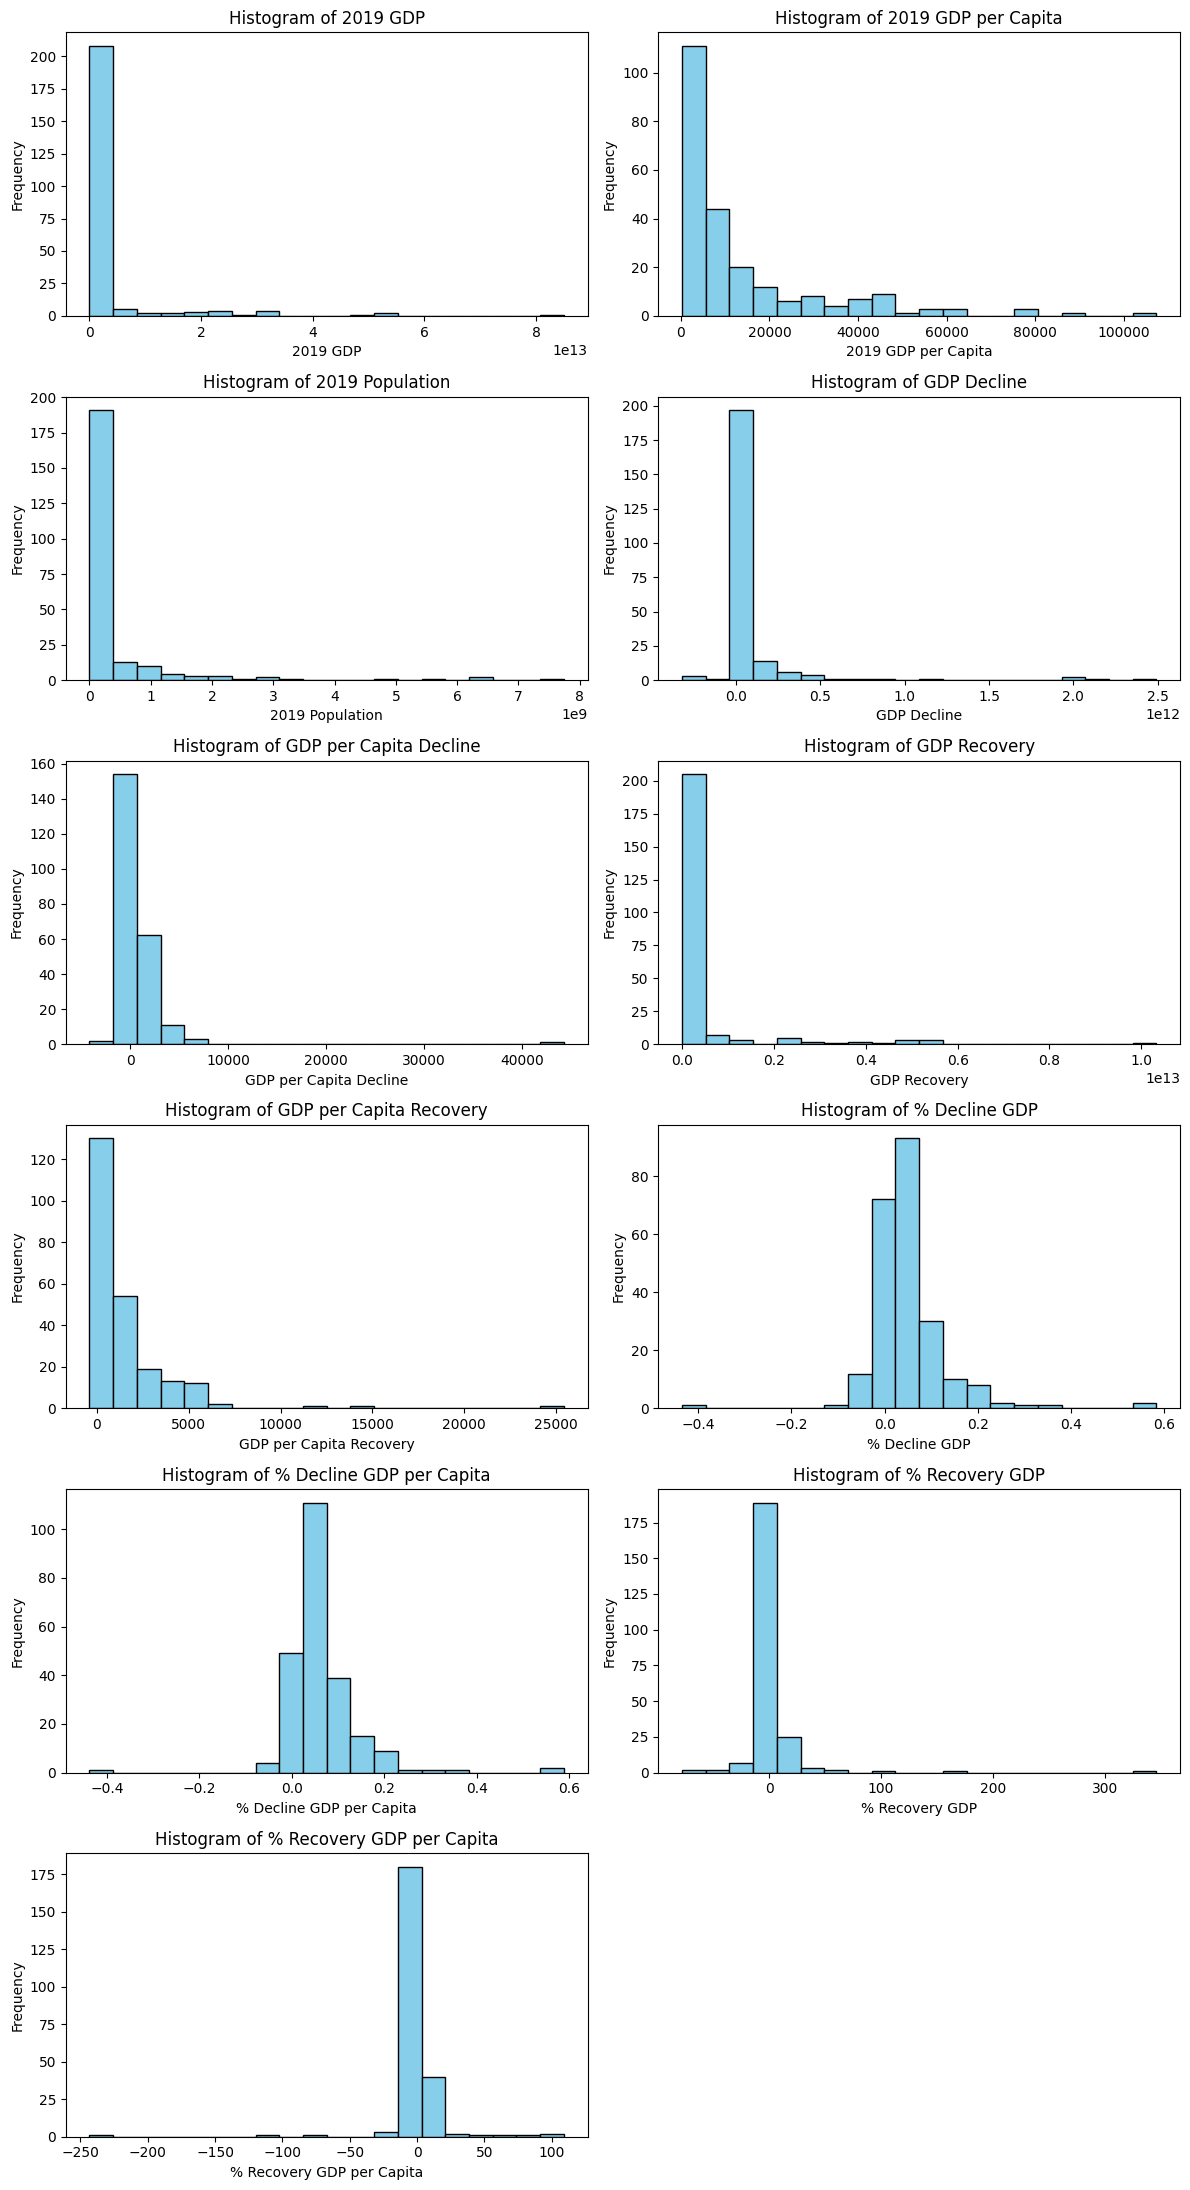

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_histograms(df):
    # Select numerical columns only
    num_cols = df.select_dtypes(include='float').columns
    num_cols_count = len(num_cols)

    # Set up a 2-column grid for the histograms
    fig, axes = plt.subplots(nrows=(num_cols_count + 1) // 2, ncols=2, figsize=(12, num_cols_count * 2))
    axes = axes.flatten()  # Flatten the array for easy indexing

    for i, col in enumerate(num_cols):
        ax = axes[i]
        ax.hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black')
        ax.set_title(f'Histogram of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')

    # Hide any extra subplots if num_cols is odd
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Example usage:
plot_histograms(world_data_final)


In [ ]:
def pairwise_correlation(df):
    # Select only numerical columns
    num_cols = df.select_dtypes(include='float').columns
    correlations = []

    # Loop over each pair of columns
    for i in range(len(num_cols)):
        for j in range(i + 1, len(num_cols)):
            col1 = num_cols[i]
            col2 = num_cols[j]
            # Calculate the correlation between the two columns
            corr_value = df[col1].corr(df[col2])
            # Append the result as a dictionary
            correlations.append({'Column 1': col1, 'Column 2': col2, 'Corr': corr_value})

    # Create the resulting DataFrame
    corr_df = pd.DataFrame(correlations)
    return corr_df

# Example usage:
corr = pairwise_correlation(ox).dropna()
corr.sort_values('Corr',ascending=False)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning:

invalid value encountered in divide



,Column 1,Column 2,Corr
1425,ContainmentHealthIndex_Average,ContainmentHealthIndex_Average_ForDisplay,1.000000
1416,GovernmentResponseIndex_Average,GovernmentResponseIndex_Average_ForDisplay,1.000000
1403,StringencyIndex_Average,StringencyIndex_Average_ForDisplay,1.000000
1430,EconomicSupportIndex,EconomicSupportIndex_ForDisplay,1.000000
1417,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,0.982730
...,...,...,...
138,C1M_School closing,V2A_Vaccine Availability (summary),-0.383014
756,C8EV_International travel controls,PopulationVaccinated,-0.399812
741,C8EV_International travel controls,H7_Vaccination policy,-0.408582
746,C8EV_International travel controls,V1_Vaccine Prioritisation (summary),-0.412375


# Oxford Data Cleaning

In [ ]:
cols_to_drop = ['RegionName',
  'RegionCode',
  'V2B_Vaccine age eligibility/availability age floor (general population summary)',
  'V2C_Vaccine age eligibility/availability age floor (at risk summary)',
  'StringencyIndex_Average_ForDisplay',
  'GovernmentResponseIndex_Average_ForDisplay',
  'ContainmentHealthIndex_Average_ForDisplay',
  'EconomicSupportIndex_ForDisplay',
  'M1_Wildcard',
  'ConfirmedCases',
  'ConfirmedDeaths',
  'MajorityVaccinated',
  'PopulationVaccinated',
  'Date',
  'Jurisdiction']
ox_sum = ox.drop(cols_to_drop,axis=1).groupby(['CountryName','CountryCode']).sum()
ox_sum.head()

,,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,C3M_Cancel public events,C3M_Flag,C4M_Restrictions on gatherings,C4M_Flag,C5M_Close public transport,C5M_Flag,...,V2D_Medically/ clinically vulnerable (Non-elderly),V2E_Education,V2F_Frontline workers (non healthcare),V2G_Frontline workers (healthcare),V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
CountryName,CountryCode,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,1018.0,472.0,1629.0,254.0,1188.0,340.0,700.0,135.0,732.0,181.0,...,1250.0,1281.0,1302.0,1302.0,3385.0,0.0,30024.46,28593.40,32566.41,775.0
Albania,ALB,1370.0,800.0,1309.0,798.0,1238.0,783.0,2685.0,783.0,262.0,73.0,...,1086.0,1185.0,1258.0,1247.0,3600.0,458.0,45793.19,49173.44,50627.79,39000.0
Algeria,DZA,1307.0,821.0,1630.0,870.0,1666.0,808.0,2490.0,538.0,915.0,122.0,...,1184.0,968.0,968.0,1400.0,3500.0,0.0,53011.03,51422.77,54430.38,30375.0
Andorra,AND,860.0,706.0,1208.0,748.0,1057.0,727.0,1888.0,491.0,652.0,652.0,...,1268.0,1198.0,1314.0,1422.0,3465.0,0.0,36701.50,51248.12,49741.40,61800.0
Angola,AGO,891.0,378.0,2056.0,897.0,1352.0,874.0,2396.0,510.0,673.0,625.0,...,1065.0,1072.0,1239.0,1072.0,3340.0,457.0,56577.42,48833.51,53773.52,14250.0


In [ ]:
ox['MajorityVaccinated'] = ox['MajorityVaccinated'].map({'NV':0,'V': 1})
max_cols = ['CountryName',
  'CountryCode',
  'ConfirmedCases',
  'ConfirmedDeaths',
  'MajorityVaccinated',
  'PopulationVaccinated']
ox_max = ox[max_cols].groupby(['CountryName','CountryCode']).max()
ox_max.head()

,,ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated
CountryName,CountryCode,,,,
Afghanistan,AFG,207559.0,7849.0,0.0,26.15
Albania,ALB,333806.0,3595.0,0.0,44.68
Algeria,DZA,271228.0,6881.0,0.0,14.43
Andorra,AND,47751.0,165.0,1.0,66.99
Angola,AGO,105095.0,1930.0,0.0,23.19


In [ ]:
ox_final = pd.merge(ox_sum,ox_max,on=['CountryName','CountryCode'])
ox_final.head()

,,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,C3M_Cancel public events,C3M_Flag,C4M_Restrictions on gatherings,C4M_Flag,C5M_Close public transport,C5M_Flag,...,V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex,ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated
CountryName,CountryCode,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,1018.0,472.0,1629.0,254.0,1188.0,340.0,700.0,135.0,732.0,181.0,...,3385.0,0.0,30024.46,28593.40,32566.41,775.0,207559.0,7849.0,0.0,26.15
Albania,ALB,1370.0,800.0,1309.0,798.0,1238.0,783.0,2685.0,783.0,262.0,73.0,...,3600.0,458.0,45793.19,49173.44,50627.79,39000.0,333806.0,3595.0,0.0,44.68
Algeria,DZA,1307.0,821.0,1630.0,870.0,1666.0,808.0,2490.0,538.0,915.0,122.0,...,3500.0,0.0,53011.03,51422.77,54430.38,30375.0,271228.0,6881.0,0.0,14.43
Andorra,AND,860.0,706.0,1208.0,748.0,1057.0,727.0,1888.0,491.0,652.0,652.0,...,3465.0,0.0,36701.50,51248.12,49741.40,61800.0,47751.0,165.0,1.0,66.99
Angola,AGO,891.0,378.0,2056.0,897.0,1352.0,874.0,2396.0,510.0,673.0,625.0,...,3340.0,457.0,56577.42,48833.51,53773.52,14250.0,105095.0,1930.0,0.0,23.19


In [ ]:
data = pd.merge(world_data_final,ox_final,how='inner',left_on='Country Code', right_on='CountryCode')
data = data[data.notna().all(axis=1)]
data=data.set_index('Country Name')
data.head()

,2019 GDP,2019 GDP per Capita,2019 Population,GDP Decline,GDP per Capita Decline,GDP Recovery,GDP per Capita Recovery,% Decline GDP,% Decline GDP per Capita,% Recovery GDP,...,V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex,ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated
Country Name,,,,,,,,,,,,,,,,,,,,,
Albania,1.296770e+10,4543.387710,2854191.0,4.282040e+08,124.726837,2.272782e+09,975.521536,0.033021,0.027452,5.307708,...,3600.0,458.0,45793.19,49173.44,50627.79,39000.0,333806.0,3595.0,0.0,44.68
Algeria,2.023009e+11,4737.129774,42705368.0,1.011504e+10,314.150302,2.295815e+10,294.419857,0.050000,0.066317,2.269704,...,3500.0,0.0,53011.03,51422.77,54430.38,30375.0,271228.0,6881.0,0.0,14.43
Andorra,3.008967e+09,39413.790878,76343.0,3.365211e+08,5019.376838,5.440298e+08,5767.355486,0.111839,0.127351,1.616629,...,3465.0,0.0,36701.50,51248.12,49741.40,61800.0,47751.0,165.0,1.0,66.99
Angola,8.626288e+10,2666.253915,32353588.0,4.863686e+09,281.133960,4.211417e+09,-51.401181,0.056382,0.105442,0.865890,...,3340.0,457.0,56577.42,48833.51,53773.52,14250.0,105095.0,1930.0,0.0,23.19
Argentina,5.714507e+11,12716.224204,44938712.0,5.657639e+10,1369.572091,7.416165e+10,1278.817438,0.099005,0.107703,1.310823,...,3665.0,0.0,57462.33,58691.70,60176.57,48300.0,9891139.0,130124.0,1.0,76.46


# Visualizations

## Sankey Chart

In [ ]:
test = pd.DataFrame({
    "Source": [
        "Total Countries in Analysis",
        "Total Countries in Analysis",
        "GDP Decreased",
        "GDP Decreased"
    ],
    "Target": [
        "GDP Decreased",
        "GDP Stable/Improved",
        "Recovered to Pre-Pandemic GDP Levels",
        "Not Recovered"
    ],
    "Value": [
        132,
        30,
        112,
        20
    ]
})


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Define your data as a pandas DataFrame
dec = data[(data['% Decline GDP']>0)]
sk_data = pd.DataFrame({
    "Source": ["Total Countries in Analysis","Total Countries in Analysis","GDP Decreased","GDP Decreased"],
    "Target": ["GDP Decreased","GDP Stable/Improved","Recovered to Pre-Pandemic GDP Levels","Not Recovered"],
    "Value": [
        len(data[(data['% Decline GDP']>0)]),
        len(data[(data['% Decline GDP']<0)]),
        len(dec[dec['% Recovery GDP'] >= 1.0]),
        len(dec[dec['% Recovery GDP'] < 1.0])
    ]
})

# Append counts to labels for clarity
node_labels_with_counts = {
    "Total Countries in Analysis": len(data),
    "GDP Decreased": len(data[(data['% Decline GDP']>0)]),
    "Recovered to Pre-Pandemic GDP Levels": len(dec[dec['% Recovery GDP'] >= 1.0]),
    "Not Recovered": len(dec[dec['% Recovery GDP'] < 1.0]),
    "GDP Stable/Improved": len(data[(data['% Decline GDP']<0)])
}

nodes = [
    "Total Countries in Analysis",
    "GDP Decreased",
    "Recovered to Pre-Pandemic GDP Levels",
    "Not Recovered",
    "GDP Stable/Improved"
]
labels = [node + ' ({})'.format(node_labels_with_counts[node]) for node in nodes]
node_indices = {node: i for i, node in enumerate(nodes)}

# Map source and target nodes to indices
sk_data['SourceID'] = sk_data['Source'].map(node_indices)
sk_data['TargetID'] = sk_data['Target'].map(node_indices)

# Define node colors
node_colors = ["grey", "blue", "green", "red", "orange"]  # "GDP Stable/Improved" is red

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=10,  # Padding between nodes
        thickness=10,  # Node thickness
        line=dict(color="black", width=0.5),  # Node border
        label=labels,  # Node labels with counts
        color=node_colors  # Node colors
    ),
    link=dict(
        source=sk_data['SourceID'],  # List of source node indices
        target=sk_data['TargetID'],  # List of target node indices
        value=sk_data['Value'],  # List of flow values
        color=["rgba(100, 150, 250, 0.5)"] * len(sk_data)  # Default link color
    )
)])

# Update layout
fig.update_layout(title_text="Figure 1. Economic Impact of COVID-19 on Countries",
                  font_size=10,
                  width=800,
                  height=500)

# Show the diagram
fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio

# Figure 1. Sankey Graph
dec = data[(data['% Decline GDP'] > 0)]
sk_data = pd.DataFrame({
    "Source": ["Total Countries in Analysis", "Total Countries in Analysis", "GDP Decreased", "GDP Decreased"],
    "Target": ["GDP Decreased", "GDP Stable/Improved", "Recovered to Pre-Pandemic GDP Levels", "Not Recovered"],
    "Value": [
        len(data[(data['% Decline GDP'] > 0)]),
        len(data[(data['% Decline GDP'] < 0)]),
        len(dec[dec['% Recovery GDP'] >= 1.0]),
        len(dec[dec['% Recovery GDP'] < 1.0])
    ]
})

# Append counts to labels for clarity
node_labels_with_counts = {
    "Total Countries in Analysis": len(data),
    "GDP Decreased": len(data[(data['% Decline GDP'] > 0)]),
    "Recovered to Pre-Pandemic GDP Levels": len(dec[dec['% Recovery GDP'] >= 1.0]),
    "Not Recovered": len(dec[dec['% Recovery GDP'] < 1.0]),
    "GDP Stable/Improved": len(data[(data['% Decline GDP'] < 0)])
}

nodes = [
    "Total Countries in Analysis",
    "GDP Decreased",
    "Recovered to Pre-Pandemic GDP Levels",
    "Not Recovered",
    "GDP Stable/Improved"
]
labels = [node + ' ({})'.format(node_labels_with_counts[node]) for node in nodes]
node_indices = {node: i for i, node in enumerate(nodes)}

# Map source and target nodes to indices
sk_data['SourceID'] = sk_data['Source'].map(node_indices)
sk_data['TargetID'] = sk_data['Target'].map(node_indices)

# Define node colors
node_colors = ["grey", "blue", "green", "red", "orange"]  # "GDP Stable/Improved" is red

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=10,  # Padding between nodes
        thickness=10,  # Node thickness
        line=dict(color="black", width=0.5),  # Node border
        label=labels,  # Node labels with counts
        color=node_colors  # Node colors
    ),
    link=dict(
        source=sk_data['SourceID'],  # List of source node indices
        target=sk_data['TargetID'],  # List of target node indices
        value=sk_data['Value'],  # List of flow values
        color=["rgba(100, 150, 250, 0.5)"] * len(sk_data)  # Default link color
    )
)])

# Update layout
fig.update_layout(title_text="Figure 1. Economic Impact of COVID-19 on Countries",
                  font_size=10,
                  width=800,
                  height=500)

# Save the diagram as an interactive HTML file
output_file = "sankey_diagram.html"
pio.write_html(fig, file=output_file, auto_open=True)

# Notify user
print(f"Interactive Sankey diagram has been saved as '{output_file}'.")


Interactive Sankey diagram has been saved as 'sankey_diagram.html'.


# Fitting Models

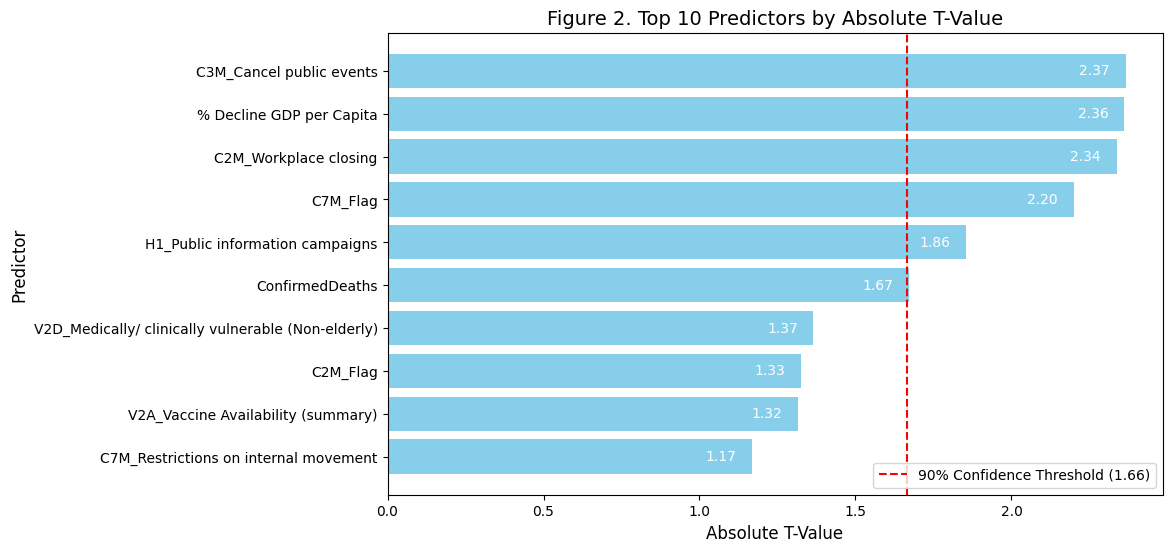

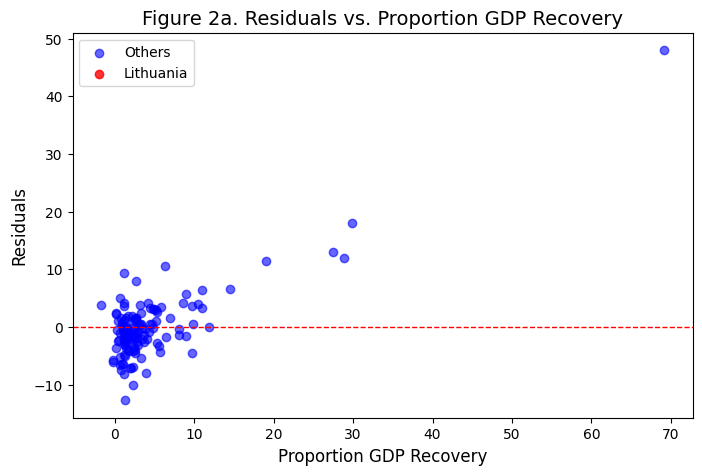

R²: 0.3370
Adjusted R²: -0.0910


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import t

gdp_dec = dec[(dec['% Recovery GDP']<300)]

X = gdp_dec.drop(['GDP Decline', 'GDP per Capita Decline', 'GDP Recovery',
       'GDP per Capita Recovery', '% Decline GDP',
       '% Recovery GDP', '% Recovery GDP per Capita'],axis=1)

std_x = (X-X.mean())/X.std()

y = gdp_dec['% Recovery GDP']

# Add a constant for the intercept
X_const = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X_const).fit()

# Extract t-values and p-values
t_values = [abs(x) for x in model.tvalues[1:]]  # Exclude the intercept
p_values = model.pvalues[1:]  # Exclude the intercept

# Combine t-values and predictor names
predictors = pd.DataFrame({
    "Predictor": X.columns,
    "t-Value": [abs(x) for x in t_values],
    "p-Value": p_values
}).sort_values(by="t-Value", ascending=False)

# Select the top 10 predictors
top_10_predictors = predictors.head(10)

# Calculate the critical t-value for a 90% confidence interval
dof = len(y) - X_const.shape[1]  # Degrees of freedom: n - (k + 1)
critical_t = t.ppf(0.95, dof)  # 0.95 for one-tailed 90% confidence

# Plot the bar graph for the top 10 predictors
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_predictors["Predictor"], top_10_predictors["t-Value"], color="skyblue")
plt.axvline(x=critical_t, color="red", linestyle="--", label=f"90% Confidence Threshold ({critical_t:.2f})")
plt.xlabel("Absolute T-Value", fontsize=12)
plt.ylabel("Predictor", fontsize=12)
plt.title("Figure 2. Top 10 Predictors by Absolute T-Value", fontsize=14)
plt.gca().invert_yaxis()  # Highest t-value at the top

# Add t-values inside the bars
for bar, t_value in zip(bars, top_10_predictors["t-Value"]):
    plt.text(
        bar.get_width() - 0.05,  # Position slightly left of bar's end
        bar.get_y() + bar.get_height() / 2,  # Center vertically
        f"{t_value:.2f}",  # Format t-value
        va="center",
        ha="right",  # Align text to the right within the bar
        color="white",  # Contrast with bar color
        fontsize=10
    )

# Add legend
plt.legend(loc="lower right")
plt.show()

  # Residuals vs. y scatterplot
residuals = model.resid  # Residuals
plt.figure(figsize=(8, 5))
plt.scatter(y[residuals <= 200], residuals[residuals <= 200], color="blue", alpha=0.6, label="Others")
outliers = residuals[residuals > 200]
plt.scatter(y[outliers.index], outliers, color="red", alpha=0.8, label="Lithuania")

# Label the points with residual > 200
for idx in outliers.index:
    plt.text(y[idx], residuals[idx], "Lithuania", fontsize=10, color="red", ha="right", va="bottom")

# Horizontal line at residual = 0
plt.axhline(0, color="red", linestyle="--", linewidth=1)

# Plot labels and title
plt.title("Figure 2a. Residuals vs. Proportion GDP Recovery", fontsize=14)
plt.xlabel("Proportion GDP Recovery", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.legend()
plt.show()

# R² and Adjusted R²
r_squared = model.rsquared
adjusted_r_squared = model.rsquared_adj

print(f"R²: {r_squared:.4f}")
print(f"Adjusted R²: {adjusted_r_squared:.4f}")

coefs = pd.DataFrame({'Coef':model.params, 'T Value':model.tvalues, 'P Value': model.pvalues})
coefs.sort_values(by='P Value').head(10)

R² Score: 0.88
Created: 'figure_3_top_10_predictors_rfr.png'.


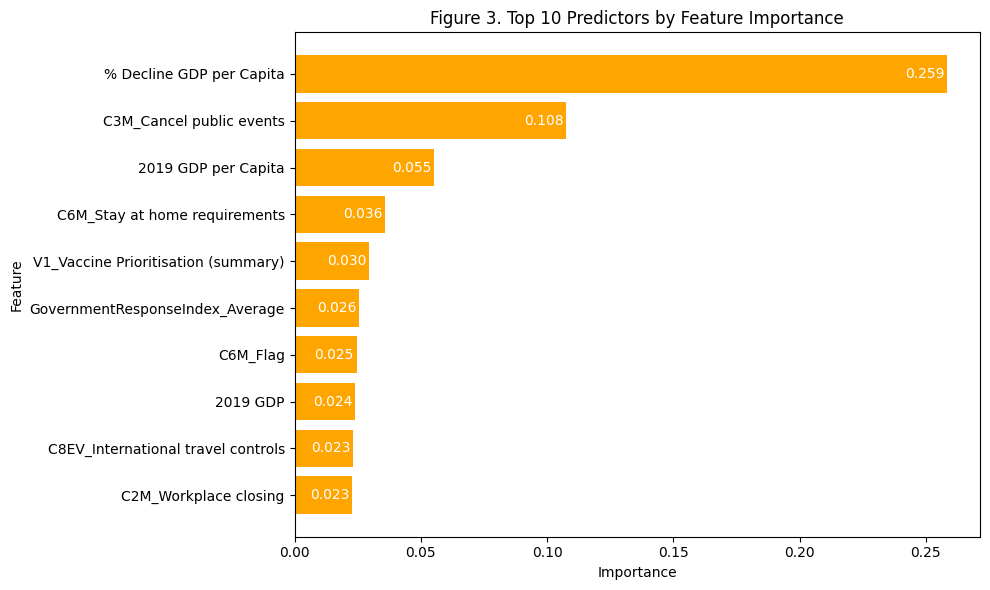

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Fit Random Forest model
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X, y)
# Predict using the trained model
y_pred = rf.predict(X)
# Find r2
rf_r2 = r2_score(y,y_pred)

# Extract feature importances
importances = rf.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Select top 10 features
top_10_features = feature_importances.head(10)

# Visualize top 10 feature importances
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='orange')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.title('Figure 3. Top 10 Predictors by Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Add t-values inside the bars
for bar, importance in zip(bars, top_10_features["Importance"]):
    plt.text(
        bar.get_width() - 0.001,  # Position slightly left of bar's end
        bar.get_y() + bar.get_height() / 2,  # Center vertically
        f"{importance:.3f}",  # Format t-value
        va="center",
        ha="right",  # Align text to the right within the bar
        color="white",  # Contrast with bar color
        fontsize=10
    )
plt.tight_layout()

# Save the figure as a PNG file
output_file = "figure_3_top_10_predictors_rfr.png"
plt.savefig(output_file, dpi=300, bbox_inches='tight')

# Notify user
print(f"Created: '{output_file}'.")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

n, p = X.shape

# Adjusted r2
def calculate_adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)
lin_adj_r2 = calculate_adjusted_r2(lin_r_squared, n, p)
rf_adj_r2 = calculate_adjusted_r2(rf_r2, n, p)

# Summary
summary = pd.DataFrame({'Model Name':['Linear Regression','Random Forest'],
                        'R²':[{lin_r_squared:.4f},{rf_r2:.4f}],
                        'Adjusted R²':[{lin_adj_r2:.4f},{rf_adj_r2:.4f}]})
summary.to_csv('Summary.csv',index=False)

# Coefs, T Values, and P Values output from Linear Regression Model
coefs = pd.DataFrame({'Coef':linreg.params, 'T Value':linreg.tvalues, 'P Value': linreg.pvalues})
coefs = coefs.sort_values(by='P Value')
coef.to_csv('Linear Regression Coefs.csv')

# Feature Importances
feature_importances.to_csv('Random Forest Feature Importances.csv',index=False)



In [ ]:
comparison

,Model,R²,Adjusted R²,Mallows' Cp
0,Linear Regression,0.336989,-0.105018,51.0
1,Lasso Regression,0.312946,-0.145090,51.0
2,Random Forest Regression,0.883977,0.806628,51.0


# Old Model Fitting

In [ ]:
import statsmodels.api as sm

std_x_const = sm.add_constant(X)
model = sm.OLS(y, std_x_const).fit()
predictions = model.predict(std_x_const)

summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:         % Recovery GDP   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     1.214
Date:                Sat, 23 Nov 2024   Prob (F-statistic):              0.218
Time:                        05:10:08   Log-Likelihood:                -354.79
No. Observations:                 130   AIC:                             813.6
Df Residuals:                      78   BIC:                             962.7
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.491e+03, tolerance: 7.446e-01

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.491e+03, tolerance: 7.446e-01

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.492e+03, tolerance: 7.446e-01

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_des

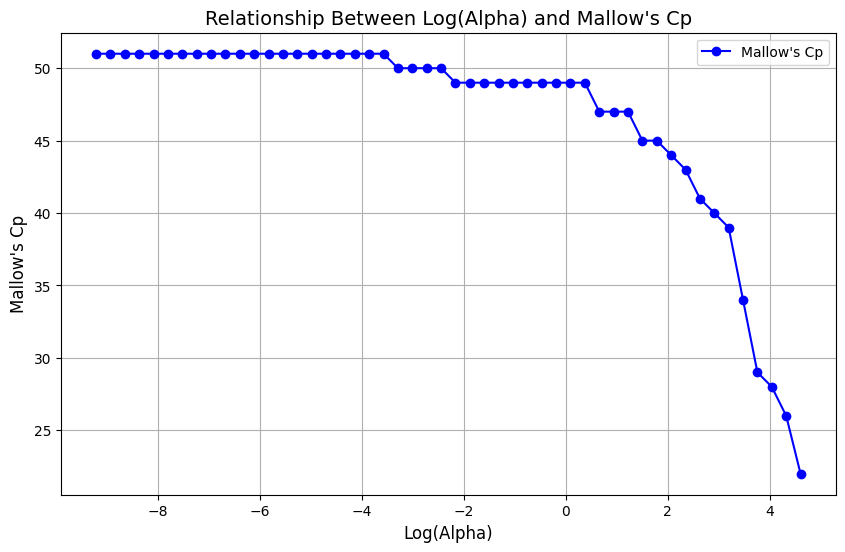

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

def calculate_mallows_cp(X, y, model, residual_sum_of_squares):
    """
    Calculate Mallow's Cp for a given model.
    Parameters:
        X (pd.DataFrame): Predictors.
        y (pd.Series): Response variable.
        model: Fitted LASSO regression model.
        residual_sum_of_squares (float): Sum of squared residuals for the model.
    Returns:
        float: Mallow's Cp value.
    """
    n = len(y)
    p = np.sum(model.coef_ != 0)  # Number of non-zero coefficients
    sigma2 = residual_sum_of_squares / (n - p - 1)  # Estimate of variance
    cp = residual_sum_of_squares / sigma2 - (n - 2 * p)
    return cp

def lasso_mallows_cp(X, y):
    """
    Fits a LASSO regression model for various alpha values and plots the relationship
    between log(alpha) and Mallow's Cp.

    Parameters:
        X (pd.DataFrame): Predictors.
        y (pd.Series): Response variable.
    """
    # Define a range of alpha values
    alphas = np.logspace(-4, 2, 50)  # 50 values between 10^-4 and 10^2

    # Initialize lists to store results
    log_alphas = []
    mallows_cp = []

    # Fit LASSO for each alpha using all data
    for alpha in alphas:
        model = Lasso(alpha=alpha, max_iter=10000)
        model.fit(X, y)

        # Calculate residual sum of squares (RSS)
        y_pred = model.predict(X)
        rss = np.sum((y - y_pred) ** 2)

        # Calculate Mallow's Cp
        cp = calculate_mallows_cp(X, y, model, rss)

        # Store results
        log_alphas.append(np.log(alpha))
        mallows_cp.append(cp)

    # Plot the relationship between log(alpha) and Mallow's Cp
    plt.figure(figsize=(10, 6))
    plt.plot(log_alphas, mallows_cp, marker='o', color='blue', label="Mallow's Cp")
    plt.xlabel("Log(Alpha)", fontsize=12)
    plt.ylabel("Mallow's Cp", fontsize=12)
    plt.title("Relationship Between Log(Alpha) and Mallow's Cp", fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

lasso_mallows_cp(X, y)


,Coef,T Value,P Value
% Decline GDP per Capita,24.648841,3.394851,0.001082
C2M_Workplace closing,-0.005955,-1.991773,0.049896
C2M_Flag,0.009471,1.789641,0.077393
E1_Flag,0.005939,1.686365,0.095722
V2D_Medically/ clinically vulnerable (Non-elderly),-0.011463,-1.539422,0.127749
C4M_Flag,-0.007424,-1.527745,0.130621
const,29.642421,1.505913,0.136129
H6M_Flag,-0.005219,-1.336322,0.185329
V3_Vaccine Financial Support (summary),-0.008359,-1.328550,0.187870
ConfirmedDeaths,-0.000017,-1.239120,0.219017


In [ ]:
X = data.drop(['GDP Decline', 'GDP per Capita Decline', 'GDP Recovery',
       'GDP per Capita Recovery', '% Decline GDP', '% Decline GDP per Capita',
       '% Recovery GDP', '% Recovery GDP per Capita'],axis=1)
y = data['% Decline GDP']

import statsmodels.api as sm

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:          % Decline GDP   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.9822
Date:                Wed, 20 Nov 2024   Prob (F-statistic):              0.518
Time:                        00:49:57   Log-Likelihood:                 191.20
No. Observations:                 162   AIC:                            -278.4
Df Residuals:                     110   BIC:                            -117.8
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [ ]:
X = data.drop(['GDP Decline', 'GDP per Capita Decline', 'GDP Recovery',
       'GDP per Capita Recovery', '% Decline GDP', '% Decline GDP per Capita',
       '% Recovery GDP', '% Recovery GDP per Capita'],axis=1)
y = data['% Decline GDP']
std_x = (X-X.mean())/X.std()
import statsmodels.api as sm

std_x_const = sm.add_constant(std_x)
model = sm.OLS(y, std_x_const).fit()
predictions = model.predict(std_x_const)

summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:          % Decline GDP   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.9822
Date:                Wed, 20 Nov 2024   Prob (F-statistic):              0.518
Time:                        00:49:57   Log-Likelihood:                 191.20
No. Observations:                 162   AIC:                            -278.4
Df Residuals:                     110   BIC:                            -117.8
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [ ]:
coefs = pd.DataFrame({'Coef':model.params, 'P_Value':model.pvalues})
coefs[coefs['P_Value']<0.1].sort_values(by='P_Value')

,Coef,P_Value
const,-0.048704,3.992001e-10
H8M_Flag,-0.043238,6.440197e-03
2019 GDP per Capita,-0.026376,5.242825e-02
EconomicSupportIndex,64.053141,5.599821e-02
GovernmentResponseIndex_Average,-229.211819,5.653084e-02
ContainmentHealthIndex_Average,196.816813,5.662394e-02
V2D_Medically/ clinically vulnerable (Non-elderly),0.042161,6.624013e-02


In [ ]:
X.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       148, 152, 153, 154, 155, 156, 158, 160, 161, 162],
      dtype='int64', length=131)

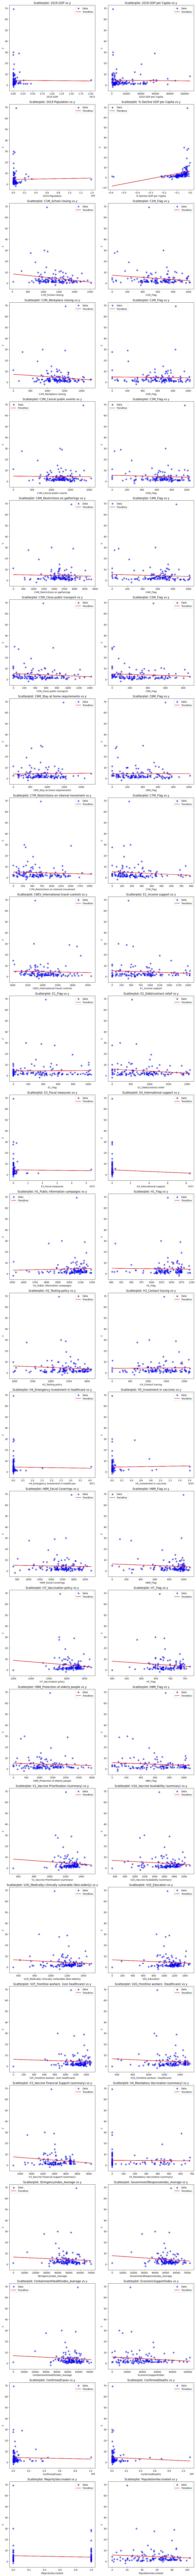

                                                 Name   Coefficient   P Value
0                            % Decline GDP per Capita  2.545788e+01  0.002221
1                                  C1M_School closing -2.987336e-03  0.042261
2                                            C1M_Flag -4.921674e-03  0.078616
3                             E2_Debt/contract relief -1.840709e-03  0.119331
4              V3_Vaccine Financial Support (summary) -4.207732e-03  0.153338
5                               C2M_Workplace closing -2.244806e-03  0.183486
6                                EconomicSupportIndex -3.662516e-05  0.195766
7                                             H7_Flag -1.885905e-02  0.201214
8                               H7_Vaccination policy -2.730854e-03  0.233032
9                                            H8M_Flag -2.292317e-03  0.270861
10                                           C7M_Flag -4.054842e-03  0.272795
11                 V2A_Vaccine Availability (summary) -2.413949e

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def analyze_relationships(X, y):
    # Ensure X and y have the same length
    assert len(X) == len(y), "X and y must have the same length."

    # Initialize an empty list to store summary statistics
    summary_data = []

    # Get numerical columns from X
    num_cols = X.select_dtypes(include='float').columns

    # Set up the plot grid
    num_plots = len(num_cols)
    fig, axes = plt.subplots(nrows=(num_plots + 1) // 2, ncols=2, figsize=(12, num_plots * 3))
    axes = axes.flatten()

    for i, col in enumerate(num_cols):
        # Get the column data
        x = X[col]
        # Perform linear regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

        # Add summary data
        summary_data.append({'Name': col, 'Coefficient': slope, 'P Value': p_value})

        # Create scatterplot
        ax = axes[i]
        ax.scatter(x, y, color='blue', alpha=0.6, label='Data')
        # Plot the trendline
        trendline = slope * x + intercept
        ax.plot(x, trendline, color='red', label=f'Trendline')
        ax.set_title(f'Scatterplot: {col} vs y')
        ax.set_xlabel(col)
        ax.set_ylabel('y')
        ax.legend()

    # Hide any unused subplot axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

    # Create the summary DataFrame
    summary = pd.DataFrame(summary_data)
    summary = summary.sort_values(by='P Value').reset_index(drop=True)

    return summary

# Example usage:
summary = analyze_relationships(X, y)
print(summary)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib.backends.backend_pdf import PdfPages

def analyze_relationships_to_pdf(X, y, output_pdf="scatterplots.pdf"):
    # Ensure X and y have the same length
    assert len(X) == len(y), "X and y must have the same length."

    # Initialize an empty list to store summary statistics
    summary_data = []

    # Get numerical columns from X
    num_cols = X.select_dtypes(include='float').columns

    # Create a PDF file to save the plots
    with PdfPages(output_pdf) as pdf:
        # Plot parameters
        plots_per_page = 6  # Two columns, three rows per page
        num_pages = (len(num_cols) + plots_per_page - 1) // plots_per_page  # Total pages needed

        for page in range(num_pages):
            fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))
            axes = axes.flatten()

            for i in range(plots_per_page):
                col_index = page * plots_per_page + i
                if col_index >= len(num_cols):
                    break

                col = num_cols[col_index]
                x = X[col]

                # Perform linear regression
                slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
                summary_data.append({'Name': col, 'Coefficient': slope, 'P Value': p_value})

                # Create scatterplot
                ax = axes[i]
                ax.scatter(x, y, color='blue', alpha=0.6, label='Data')
                trendline = slope * x + intercept
                ax.plot(x, trendline, color='red', label='Trendline')
                ax.set_title(f'Scatterplot: {col} vs y')
                ax.set_xlabel(col)
                ax.set_ylabel('y')
                ax.legend()

            # Hide any unused subplot axes
            for j in range(i + 1, len(axes)):
                fig.delaxes(axes[j])

            plt.tight_layout()
            pdf.savefig(fig)  # Save the current figure to the PDF
            plt.close(fig)

    # Create the summary DataFrame
    summary = pd.DataFrame(summary_data)
    summary = summary.sort_values(by='P Value').reset_index(drop=True)

    return summary

# Example usage:
summary = analyze_relationships_to_pdf(X, y, output_pdf="output_scatterplots.pdf")
summary


,Name,Coefficient,P Value
0,V4_Mandatory Vaccination (summary),-1.961890e-02,0.023485
1,V3_Vaccine Financial Support (summary),1.480528e-02,0.033025
2,H1_Flag,-8.061727e-02,0.051307
3,C8EV_International travel controls,-6.183201e-03,0.088295
4,H7_Flag,4.229659e-02,0.223221
5,H2_Testing policy,4.141115e-03,0.237225
6,MajorityVaccinated,-4.048786e+00,0.264586
7,E1_Income support,3.514213e-03,0.278301
8,C2M_Flag,6.856611e-03,0.308628
9,V2D_Medically/ clinically vulnerable (Non-elde...,7.494619e-03,0.426722


R² Score: 0.88


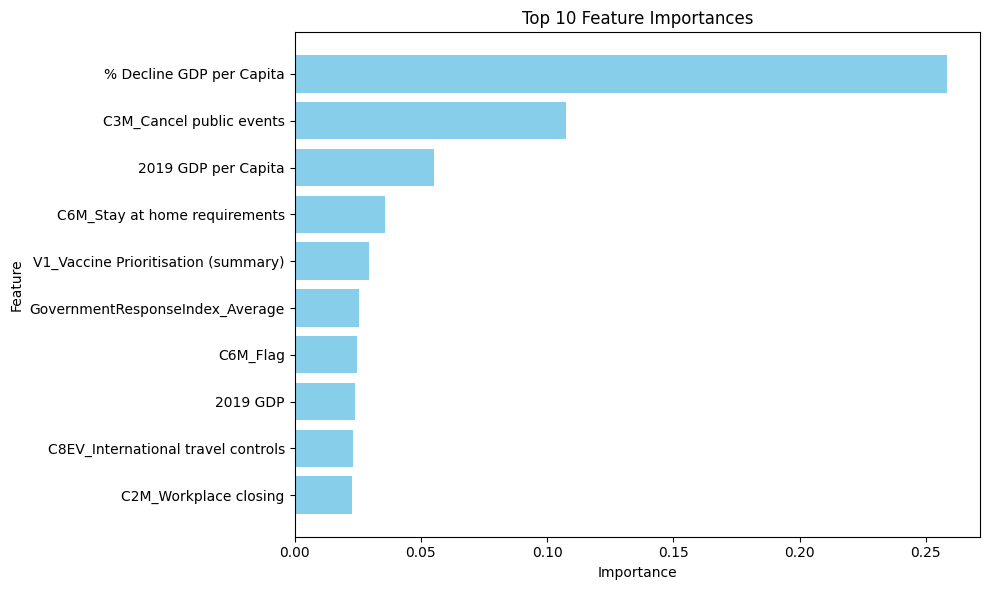

                                              Feature  Importance
0                            % Decline GDP per Capita    0.258560
1                            C3M_Cancel public events    0.107610
2                                 2019 GDP per Capita    0.055232
3                       C6M_Stay at home requirements    0.035858
4                 V1_Vaccine Prioritisation (summary)    0.029688
5                     GovernmentResponseIndex_Average    0.025507
6                                            C6M_Flag    0.024554
7                                            2019 GDP    0.024012
8                  C8EV_International travel controls    0.023200
9                               C2M_Workplace closing    0.022734
10             V3_Vaccine Financial Support (summary)    0.021215
11                                           H6M_Flag    0.020767
12                                    2019 Population    0.019478
13                                           C3M_Flag    0.019459
14        

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

def fit_random_forest_and_visualize_importance(X, y):
    """
    Fits a Random Forest regression model to the data and visualizes
    the top 10 feature importances in a bar chart.

    Parameters:
    - X (pd.DataFrame): DataFrame containing predictor variables.
    - y (pd.Series or np.array): Series or array containing the response variable.

    Returns:
    - feature_importances (pd.DataFrame): DataFrame with feature names and their importance scores.
    """

    # Ensure X and y are compatible
    assert len(X) == len(y), "X and y must have the same number of rows."

    # Preprocessing: Standardize the features for better model performance

    # Fit Random Forest model
    model = RandomForestRegressor(random_state=42, n_estimators=100)
    model.fit(X, y)
    # Predict using the trained model
    y_pred = model.predict(X)

    # Compute R²
    r2 = r2_score(y,y_pred)
    print(f"R² Score: {r2:.2f}")

    # Extract feature importances
    importances = model.feature_importances_
    feature_importances = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    })

    # Sort by importance
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Select top 10 features
    top_10_features = feature_importances.head(10)

    # Visualize top 10 feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
    plt.gca().invert_yaxis()  # Highest importance at the top
    plt.title('Top 10 Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

    return feature_importances

# Example usage:
feature_importances = fit_random_forest_and_visualize_importance(X, y)
print(feature_importances)


In [ ]:
world_data_final[world_data_final['2019 GDP per Capita']>100000]

Series Name,Country Name,2019 GDP,2019 GDP per Capita,2019 Population,GDP Decline,GDP per Capita Decline,GDP Recovery,GDP per Capita Recovery,% Decline GDP,% Decline GDP per Capita,% Recovery GDP,% Recovery GDP per Capita
Country Code,,,,,,,,,,,,
LUX,Luxembourg,6.655750e+10,107350.626687,620001.0,-6.055599e+08,-2734.592009,4.918068e+09,1380.626819,-0.009098,-0.025473,8.121521,0.504875
